## Arewa Data Science Academy
### Deep Learning Cohort2.0

#### Name: Umar Faruk Ibrahim
#### Email: ibrahimumarfaruk2000@gmail.com
#### Title: Week 3 Solution

## 1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
* For consistency, the dataset should have 1000 samples and a random_state=42.

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000,
                  noise = 0.02,
                  random_state=42)

X.shape, y.shape

((1000, 2), (1000,))

* Turn the data into PyTorch tensors.

In [2]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:10], y[:10]

(tensor([[-0.0033,  0.3834],
         [ 0.9435, -0.4815],
         [ 0.9258, -0.4495],
         [ 0.4305, -0.3661],
         [-0.8470,  0.5279],
         [ 0.5747, -0.3688],
         [ 0.2961, -0.2104],
         [-0.0085,  0.4300],
         [ 1.6297, -0.2780],
         [ 0.6662,  0.7761]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

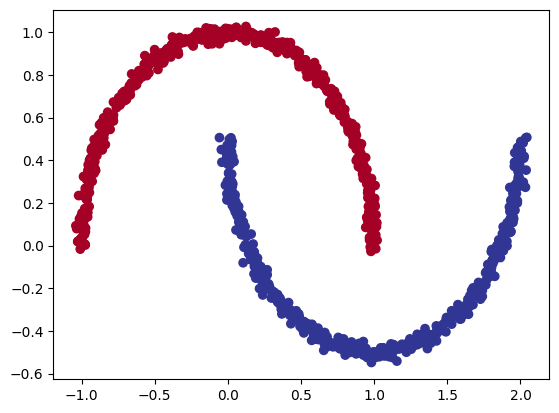

In [3]:
# Let's Visualize our data

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

* Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

In [5]:
from typing import BinaryIO
from torch import nn

class BinaryClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.layer_2(self.relu(self.layer_1(x))))

model_0 = BinaryClassifierModel()
model_0

BinaryClassifierModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [6]:
loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1 above


In [7]:
# A function that calculates the model's accuracy

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [8]:
# Checking for GPU. i.e: Device agonistic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [9]:
# Moving the Training and Testing Data to target device

X_train, y_train = X_train.to(device), y_train.to(device)

X_test, y_test = X_test.to(device), y_test.to(device)

In [10]:
from re import A
epochs = 2000
model_0.to(device)

for epoch in range(epochs):
  # Model Training
  model_0.train()

  y_pred = model_0(X_train).squeeze()

  loss = loss_fn(y_pred, y_train)
  train_acc = accuracy_fn(y_true=y_train, y_pred=torch.round(y_pred))

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Model Evaluation
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test).squeeze()
    test_loss = loss_fn(test_pred, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=torch.round(test_pred))

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Training Loss: {loss} | Training Accuracy: {train_acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")

Epoch: 0 | Training Loss: 0.6686866879463196 | Training Accuracy: 76.875 | Test Loss: 0.6710902452468872 | Test Accuracy: 73.5
Epoch: 10 | Training Loss: 0.6346657276153564 | Training Accuracy: 76.375 | Test Loss: 0.6405210494995117 | Test Accuracy: 73.5
Epoch: 20 | Training Loss: 0.6016344428062439 | Training Accuracy: 78.625 | Test Loss: 0.6103798747062683 | Test Accuracy: 74.5
Epoch: 30 | Training Loss: 0.5680203437805176 | Training Accuracy: 80.375 | Test Loss: 0.5791990756988525 | Test Accuracy: 75.5
Epoch: 40 | Training Loss: 0.5336211919784546 | Training Accuracy: 81.5 | Test Loss: 0.5464696288108826 | Test Accuracy: 76.0
Epoch: 50 | Training Loss: 0.4989948272705078 | Training Accuracy: 82.5 | Test Loss: 0.5129013061523438 | Test Accuracy: 77.0
Epoch: 60 | Training Loss: 0.4651618003845215 | Training Accuracy: 83.25 | Test Loss: 0.47983816266059875 | Test Accuracy: 79.0
Epoch: 70 | Training Loss: 0.43418997526168823 | Training Accuracy: 83.5 | Test Loss: 0.449664443731308 | Tes

## 5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in *https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py*

In [11]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [12]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds[:10]

tensor([[0.9919],
        [0.0912],
        [0.9962],
        [0.0386],
        [0.9422],
        [0.8612],
        [0.6270],
        [0.8572],
        [0.9970],
        [0.1093]], device='cuda:0')

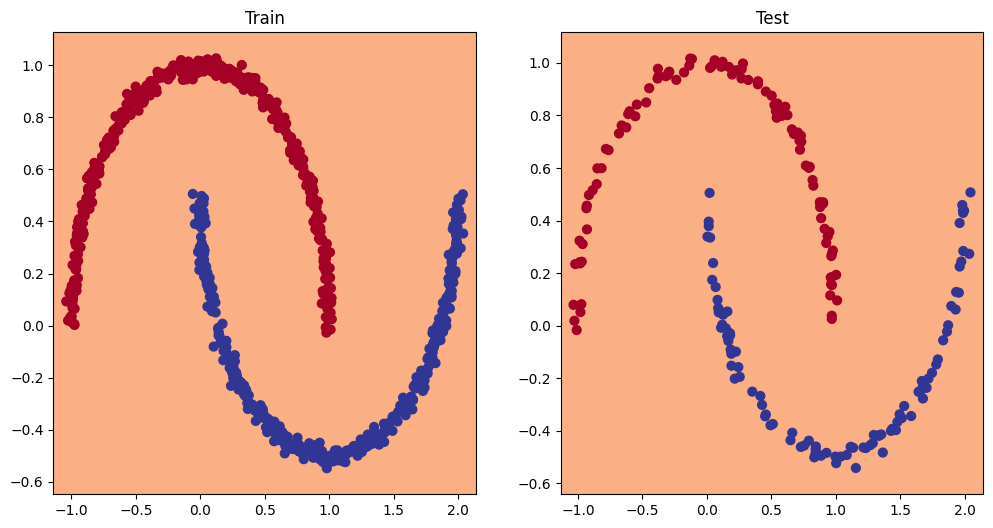

In [13]:
# Plot decision boundaries for training and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

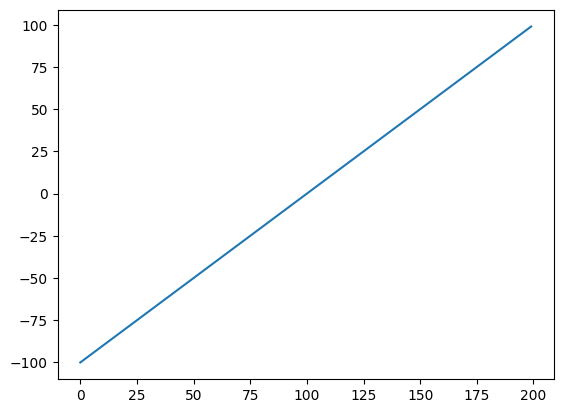

In [14]:
tensor_A = torch.arange(-100, 100, 1)
plt.plot(tensor_A)

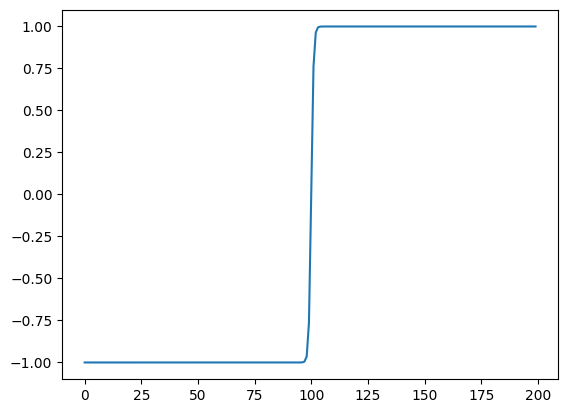

In [15]:
plt.plot(torch.tanh(tensor_A))

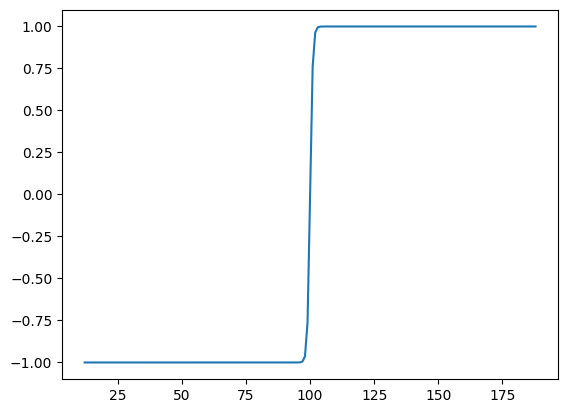

In [16]:
def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(tensor_A))

## 7. Create a multi-class dataset using the spirals data creation function from CS231n.
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).

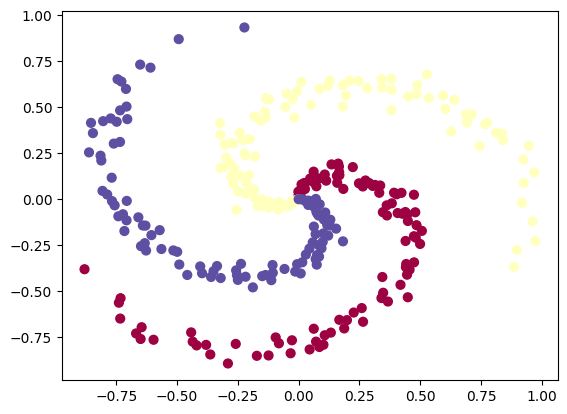

In [17]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Converting data to tensors and also splitting into training and testing

In [18]:
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

Creating our Spiral model

In [19]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

model_1 = SpiralModel().to(device)
model_1

SpiralModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

* Build a loss function and optimizer capable of handling multi-class data.

In [20]:
loss_fn1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(params=model_1.parameters(), lr=0.01)

* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy.

In [23]:
epochs = 3000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ## Training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn1(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer1.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer1.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn1(test_logits, y_test)
    test_acc = accuracy_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.34 Acc: 77.92 | Test loss: 0.77 Test acc: 80.00
Epoch: 100 | Loss: 0.34 Acc: 80.42 | Test loss: 0.78 Test acc: 78.33
Epoch: 200 | Loss: 0.33 Acc: 83.33 | Test loss: 0.77 Test acc: 80.00
Epoch: 300 | Loss: 0.33 Acc: 84.17 | Test loss: 0.80 Test acc: 80.00
Epoch: 400 | Loss: 0.33 Acc: 86.67 | Test loss: 0.81 Test acc: 80.00
Epoch: 500 | Loss: 0.32 Acc: 85.83 | Test loss: 0.81 Test acc: 83.33
Epoch: 600 | Loss: 0.32 Acc: 85.42 | Test loss: 0.84 Test acc: 80.00
Epoch: 700 | Loss: 0.32 Acc: 85.83 | Test loss: 0.88 Test acc: 80.00
Epoch: 800 | Loss: 0.32 Acc: 86.25 | Test loss: 0.89 Test acc: 80.00
Epoch: 900 | Loss: 0.32 Acc: 84.17 | Test loss: 0.91 Test acc: 83.33
Epoch: 1000 | Loss: 0.32 Acc: 84.17 | Test loss: 0.94 Test acc: 80.00
Epoch: 1100 | Loss: 0.32 Acc: 76.25 | Test loss: 0.98 Test acc: 78.33
Epoch: 1200 | Loss: 0.32 Acc: 85.42 | Test loss: 0.98 Test acc: 83.33
Epoch: 1300 | Loss: 0.32 Acc: 85.83 | Test loss: 1.01 Test acc: 81.67
Epoch: 1400 | Loss: 0.32 Acc: 86

* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

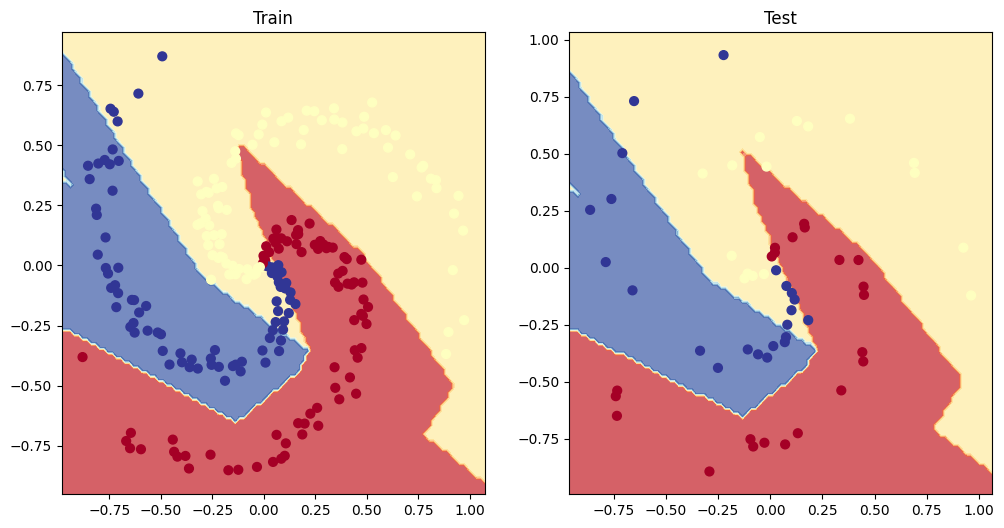

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)